<a href="https://colab.research.google.com/github/Katkins178/KendallA_DTSC4050_Fall2025/blob/main/KA0955_Week_05_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 5 - Assignment
Kendall Atkins



## Getting Started

* Colab - get notebook from gitmystuff DTSC4050 repository
* Save a Copy in Drive
* Remove Copy of
* Edit name
* Take attendance
* Clean up Colab Notebooks folder
* Submit shared link

## Getting to Know your Distributions

**Instructions**

Given 5 distributions, use the fitter library to see which KDE plot best fits the generated data from the distribution then, ask your LLM to describe the distribution and give examples of real-world phenomena it might model.

<pre>
# import scipy.stats as st
# import numpy as np

# dist_name_str = my_distributions.pop()  
# dist_obj = getattr(st, dist_name_str)  # Get the actual distribution *object* using getattr
# print(dist_name_str)  
# data = dist_obj.rvs(size=1000)  # Use the object directly
# dist_name_str = [dist_name_str]  # Make it a list (if fit_data requires it)
# fit_data(data, dist_name_str)
</pre>

### Step 1

Set up your random seed, run this cell

In [1]:
# # set seed
import time
import numpy as np
import random

def generate_user_seed():
#     # Get current time in nanoseconds (more granular)
    nanoseconds = time.time_ns()

#     # Add a small random component to further reduce collision chances
    random_component = random.randint(0, 1000)  # Adjust range as needed

#     # Combine them (XOR is a good way to mix values)
    seed = nanoseconds ^ random_component

#     # Ensure the seed is within the valid range for numpy's seed
    seed = seed % (2**32)  # Modulo to keep it within 32-bit range

    return seed

user_seed = generate_user_seed()
print(user_seed)
np.random.seed(user_seed)

1922547387


### Step 2

You may need to install fitter, uncomment the next cell and then execute it

In [2]:
pip install fitter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 49.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.2/70.2 kB 2.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.2

### Step 3

Get a list of available distributions that we can work with. Run the next cell to make the list available.

In [1]:
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import pprint

def generate_defaults(dist):
    """Generates distribution with default parameters."""
    try:
        data = dist.rvs(size=1000)  # Generate data with defaults
        return True # Return true if it works
    except Exception as e:
        return False # Return false if it fails

continuous_dists = []
for dist_name_str in dir(st):
    dist_object = getattr(st, dist_name_str)
    if isinstance(dist_object, st.rv_continuous):
        continuous_dists.append(dist_object)

successful_dists = []
for dist in continuous_dists:
    if generate_defaults(dist):
        successful_dists.append(dist.__class__.__name__)

successful_dists = [item.replace("_gen", "") for item in successful_dists]

for dist in ["norm"]:
  try:
      successful_dists.remove(dist)
  except:
      pass

pprint.pprint(successful_dists, compact=True)

['anglit', 'arcsine', 'cauchy', 'cosine', 'expon', 'gibrat', 'gumbel_l',
 'gumbel_r', 'halfcauchy', 'halflogistic', 'halfnorm', 'hypsecant', 'kstwobign',
 'landau', 'laplace', 'levy', 'levy_l', 'logistic', 'maxwell', 'moyal',
 'rayleigh', 'semicircular', 'uniform', 'wald']


### Step 4

Randomly select 4 distributions using sample

In [2]:
import random

my_distributions = []
my_distributions.extend(random.sample(successful_dists, 4))
print(my_distributions)

['landau', 'moyal', 'levy_l', 'anglit']


### Step 5

Run the next cell to have a fitter function available

In [3]:
from fitter import Fitter, get_common_distributions

def fit_data(data, distributions=None):
  common_distributions = get_common_distributions()
  if distributions not in common_distributions:
    distributions = common_distributions + distributions
  else:
    distributions = common_distributions
  distributions = distributions + get_common_distributions()
  f = Fitter(data, distributions=distributions)
  f.fit()
  f.summary()

### Step 6

Create, fit, and describe 5 distributions, the first one being the normal distribution and the other four being the distributions provided in the my_distributions list.

## Distribution 1

['norm']


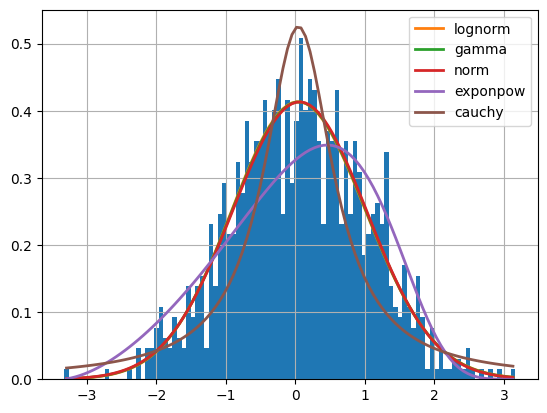

In [7]:
# code here
data = st.norm.rvs(size=1000)
dist_name = ["norm"]
print(dist_name)
fit_data(data, dist_name)

## Real World Phenomena

prompt = Describe the {dist_name} distribution and give examples of real-world phenomena it might model.

Answer: Normal distibution is symetrical and bell shaped. A real world example is male heights.


## Distribution 2

['landau']


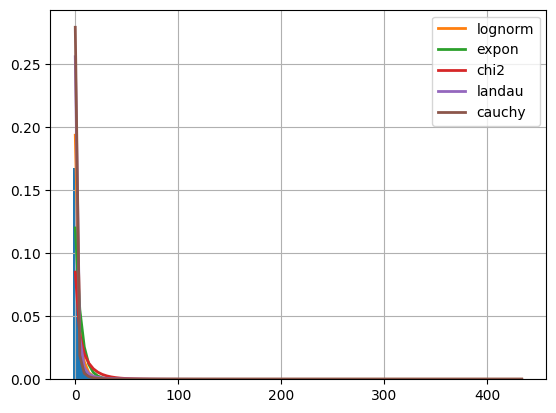

In [4]:
data = st.landau.rvs(size=1000)
dist_name = ["landau"]
print(dist_name)
fit_data(data, dist_name)

## Real World Phenomena

prompt = Describe the {dist_name} distribution and give examples of real-world phenomena it might model.

Answer: Long right tail with a sharp peak showing extremely large values occasionally happpen. An example is Energy loss of charged particles in physics.


## Distribution 3

['moyal']


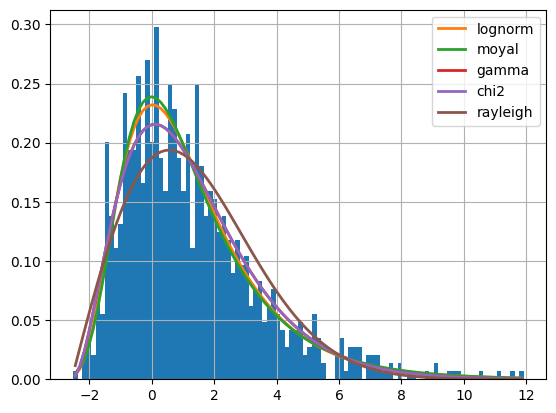

In [5]:
# code here
data = st.moyal.rvs(size=1000)
dist_name = ["moyal"]
print(dist_name)
fit_data(data, dist_name)

## Real World Phenomena

prompt = Describe the {dist_name} distribution and give examples of real-world phenomena it might model.

Answer: Right skewed curve that rises quickly and falls slowly. An example is how many people arrive tight when a sale starts, then fewer trickle in over time.


## Distribution 4

['levy_l']


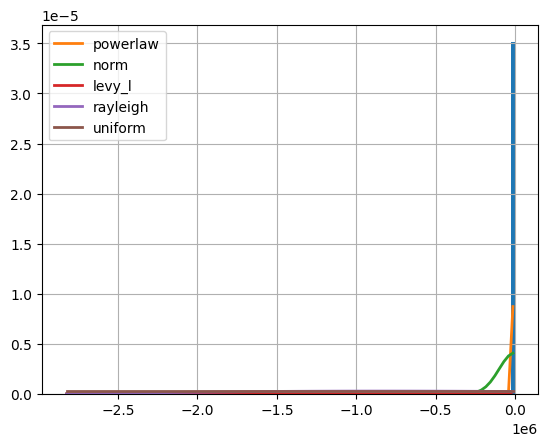

In [6]:
# code here
data = st.levy_l.rvs(size=1000)
dist_name = ["levy_l"]
print(dist_name)
fit_data(data, dist_name)

## Real World Phenomena

prompt = Describe the {dist_name} distribution and give examples of real-world phenomena it might model.

Answer: Has a sharp drop near zero and an extremely long tail. An example is the daily movements in house prices.


## Distribution 5

['anglit']


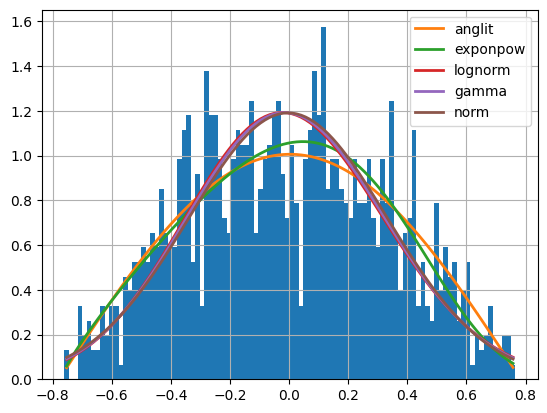

In [9]:
# code here
data = st.anglit.rvs(size=1000)
dist_name = ["anglit"]
print(dist_name)
fit_data(data, dist_name)

## Real World Phenomena

prompt = Describe the {dist_name} distribution and give examples of real-world phenomena it might model.

Answer: Low wide symetric hill. An example of this would be steering wheel adjustments while a driver is staying in their lane.
